# Implement of RBF interplation (For 2D)

## Generate test dataset

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### y = x ^ 2 dataset

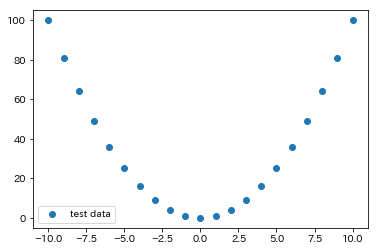

In [44]:
# generate dataset
x_array = np.arange(-10, 11, 1)
y_array = x_array ** 2

# plot dataset
plt.figure()
plt.scatter(x_array, y_array, label="test data")
plt.legend()

## Define RBF interpolation class

In [25]:
# define RBF Interpolation class
class rbfInterpolation():
    
    #     set input datasets
    def __init__(self, x_array, y_array):
        self.x_array = x_array
        self.y_array = y_array.reshape(-1, 1)
        self.phi_matrix = np.zeros((self.x_array.shape[0], self.y_array.shape[0]))
        self.weight_matrix = np.zeros((self.x_array.shape[0], self.y_array.shape[0]))

    #     define phi function
    def phi(self, x, c):
        beta = 1
        return np.exp(-beta * np.linalg.norm(x - c))
    
    #     generate phi matrix
    def gen_phi_matrix(self):
        for row_idx in range(self.x_array.shape[0]):
            for column_idx in range(self.y_array.shape[0]):
                self.phi_matrix[column_idx, row_idx] = self.phi(self.x_array[row_idx],
                                                                self.x_array[column_idx])

    #     calculate weight matrix from inverse of phi matrix and y array 
    def gen_weight_matrix(self):
        self.weight_matrix = np.linalg.pinv(self.phi_matrix) @ self.y_array
    
    #     fit input data
    def fit(self):
        self.gen_phi_matrix()
        self.gen_weight_matrix()
    
    #     interpolate data form input value
    def predict(self, x):
        
        #         initialize return value
        y = 0
        
        #         summantion of RBF interpolation
        for data_idx in range(self.x_array.shape[0]):
            y += self.weight_matrix[data_idx] * self.phi(x, self.x_array[data_idx])
        
        return y

## Test RBF Interpolation (y = x ^2)

### Generate test dataset

In [47]:
x_test_array = np.arange(-9.5, 9.5, 1)
y_test_array = np.zeros((x_test_array.shape))

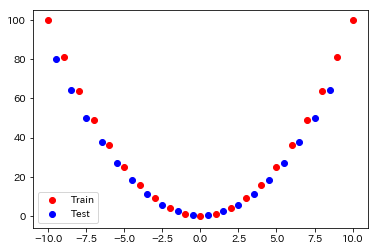

In [48]:
rfb_interpolation = rbfInterpolation(x_array, y_array)
rfb_interpolation.fit()

# interpolate value
for x_test_idx in range(x_test_array.shape[0]):
    y_test_array[x_test_idx] = rfb_interpolation.predict(x_test_array[x_test_idx])

# plot train and interpolated test dataset
plt.figure()
plt.scatter(x_array, y_array, label="Train", color="r")
plt.scatter(x_test_array, y_test_array, label="Test", color="b")
plt.legend()

## Test RBF Interpolation (visualize head pose estimation) [2]

### Generate head pose dataset

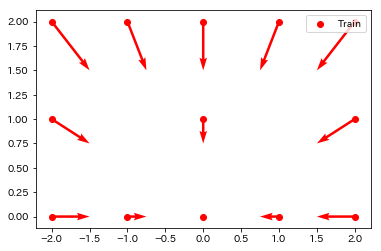

In [49]:
# generate head pose dataset
x_head_part_one = np.arange(-2, 3, 1)
x_head_part_two = np.arange(-2, 3, 2)
x_head = np.hstack([x_head_part_one, x_head_part_two, x_head_part_one])

y_head_part_one = np.array([0 for _ in range (5)])
y_head_part_two = np.array([1 for _ in range (3)])
y_head_part_three = np.array([2 for _ in range (5)])
y_head = np.hstack([y_head_part_one, y_head_part_two, y_head_part_three])

u_head = (-1 * x_head) / 4
v_head = (-1 * y_head) / 4

# plot head pose dataset (Vector field show human head pose)
plt.figure()
plt.scatter(x_head, y_head, color="red", label="Train")
plt.quiver(x_head, y_head, u_head, v_head , color='red', angles='xy', scale_units='xy', scale=1.0)
plt.legend()

### Generate test head pose dataset

In [ ]:
x_head_test = np.array([-1, -0.5, 0.5, 1])
y_head_test = np.array([1, 1, 1, 1])
u_head_test = np.zeros(x_head_test.shape)
v_head_test = np.zeros(y_head_test.shape)

### Interpolate (-0.5, 1) and (0.5, 1) head pose data

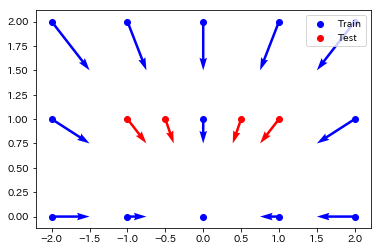

In [39]:
rfb_interpolation_u = rbfInterpolation(x_head, u_head)
rfb_interpolation_v = rbfInterpolation(y_head, v_head)
rfb_interpolation_u.fit()
rfb_interpolation_v.fit()

# interpolate u value from x coordinate
for x_test_idx in range(x_head_test.shape[0]):
    u_head_test[x_test_idx] = rfb_interpolation_u.predict(x_head_test[x_test_idx])

# interpolate v value from y coordinate
for y_test_idx in range(y_head_test.shape[0]):
    v_head_test[y_test_idx] = rfb_interpolation_v.predict(y_head_test[y_test_idx])

# plot head pose dataset (Vector field show human head pose)
plt.figure()
plt.scatter(x_head, y_head, label="Train", color="b")
plt.scatter(x_head_test, y_head_test, label="Test", color="r")
plt.quiver(x_head, y_head, u_head, v_head , color='blue', angles='xy', scale_units='xy', scale=1.0)
plt.quiver(x_head_test, y_head_test, u_head_test, v_head_test , color='red', angles='xy', scale_units='xy', scale=1.0)
plt.legend()

# References

[1] http://yuki-koyama.hatenablog.com/entry/2014/05/04/132552  
[2] https://www.cc.gatech.edu/cpl/projects/playevolution/cvpr2010-pe.pdf